# Best Algorithm for Wine Quality Prediction

In [1]:
! pip install xgboost
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
# from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

DEPRECATION: Loading egg at c:\users\admin\anaconda3\lib\site-packages\sensor-1.0.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
df=pd.read_csv('QualityPrediction.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

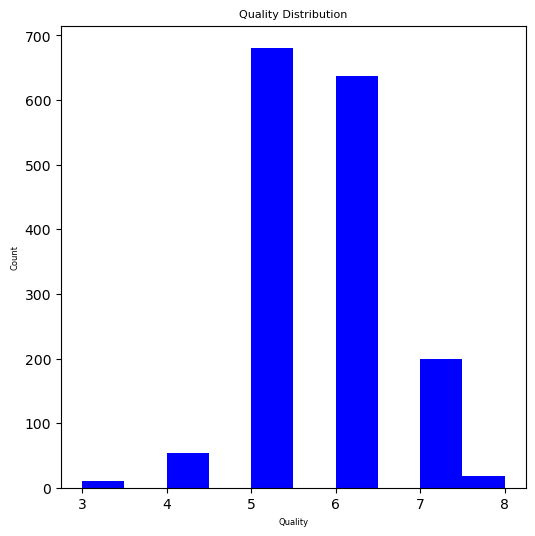

In [9]:
plt.figure(figsize=(6,6))
plt.hist(df.quality,color='b')
plt.title('Quality Distribution',size=8)
plt.xlabel('Quality',size=6)
plt.ylabel('Count',size=6)
plt.show()

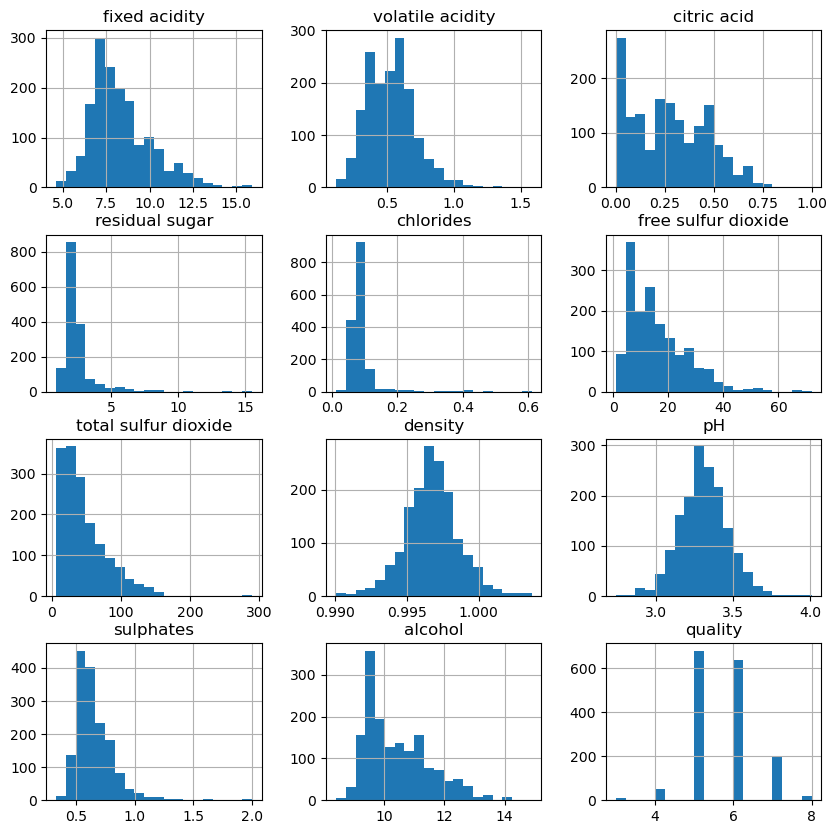

In [10]:
df.hist(bins=20,figsize=(10,10))
plt.show()

### Classifying the quality of wine into 2 categories, 1 being 'Good' and 0 being 'Bad' based on the mean value of the target categories

In [17]:
np.mean([3,4,5,6,7,8])

5.5

In [18]:
df['quality']=df['quality'].apply(lambda x:1 if x>=5.5 else 0)

In [19]:
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

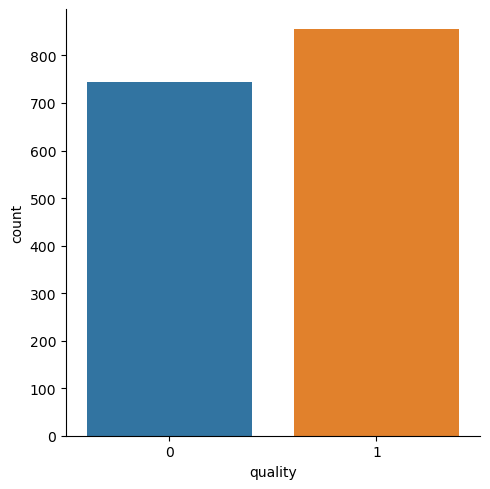

In [20]:
sns.catplot(data=df, x='quality', kind="count")
plt.show()

In [21]:
X=df.drop('quality',axis=1)
y=df['quality']

In [28]:
def total_cost(y_true, y_pred):

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 100*fp + 300*fn
    return cost


def evaluate_clf(true, predicted):

    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)

    return acc, f1, precision, recall, roc_auc


def evaluate_model(X, y, models):

    # split of the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=101)

    cost_list = []
    model_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        # train the model
        model.fit(X_train, y_train)

        # make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # training set performance
        model_train_acc, model_train_f1, model_train_pre, model_train_recall, model_train_auc = evaluate_clf(y_train, y_train_pred)

        train_cost = total_cost(y_train, y_train_pred)

        # test set performance
        model_test_acc, model_test_f1, model_test_pre, model_test_recall, model_test_auc = evaluate_clf(y_test, y_test_pred)

        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        model_list.append(list(models.keys())[i])

        print("model Perfomance for Training data")
        print(f"Accuracy: {model_train_acc}")
        print(f"f1 score: {model_train_f1}")
        print(f"precision score: {model_train_pre}")
        print(f"recall score: {model_train_recall}")
        print(f"total cost: {train_cost}")

        print('-'*60)

        print("model Perfomance for test data")
        print(f"Accuracy: {model_test_acc}")
        print(f"f1 score: {model_test_f1}")
        print(f"precision score: {model_test_pre}")
        print(f"recall score: {model_test_recall}")
        print(f"total cost: {test_cost}")
        cost_list.append(test_cost)
        print('='*60)

    report = pd.DataFrame(list(zip(model_list , cost_list)), columns=["model", "cost"]).sort_values(by=["cost"])
    return report

In [26]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Gradient boosting' : GradientBoostingClassifier(),
    'xgbclassifier' : XGBClassifier(),
}

In [27]:
robust_scaler=RobustScaler()
X_robust = robust_scaler.fit_transform(X)

In [29]:
report = evaluate_model(X_robust, y, models)

Logistic Regression
model Perfomance for Training data
Accuracy: 0.7529319781078968
f1 score: 0.7706821480406387
precision score: 0.7729257641921398
recall score: 0.768451519536903
total cost: 63600
------------------------------------------------------------
model Perfomance for test data
Accuracy: 0.721875
f1 score: 0.7327327327327329
precision score: 0.7218934911242604
recall score: 0.7439024390243902
total cost: 17300
Random Forest
model Perfomance for Training data
Accuracy: 1.0
f1 score: 1.0
precision score: 1.0
recall score: 1.0
total cost: 0
------------------------------------------------------------
model Perfomance for test data
Accuracy: 0.809375
f1 score: 0.8200589970501475
precision score: 0.7942857142857143
recall score: 0.8475609756097561
total cost: 11100
Decision Tree
model Perfomance for Training data
Accuracy: 1.0
f1 score: 1.0
precision score: 1.0
recall score: 1.0
total cost: 0
------------------------------------------------------------
model Perfomance for test 

In [30]:
report

,model,cost
1,Random Forest,11100
4,xgbclassifier,11500
3,Gradient boosting,13200
2,Decision Tree,15800
0,Logistic Regression,17300
